In [1]:
#To Preprocess artist and artwork datatsets and perform KNN algorithm.
#Datasets merged after preprocessing. The prediction performed on the basis of id and yearOfBirth features. 
#Value of K calculated using Euclidean formula .

In [3]:
import numpy as np 
import pandas as pd 
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

artists = pd.read_csv('artist_data.csv')
artworks = pd.read_csv('artwork_data.csv')

In [9]:
#counting missing values in each column 
#artists
count_missing_values_artists = artists.isnull().sum()
count_missing_values_artists

id                 0
name               0
gender           116
dates             62
yearOfBirth       60
yearOfDeath     1304
placeOfBirth     492
placeOfDeath    2079
url                0
dtype: int64

In [10]:
#artworks
count_missing_values_artworks = artworks.isnull().sum()
count_missing_values_artworks

id                        0
accession_number          0
artist                    0
artistRole                0
artistId                  0
title                     0
dateText                  0
medium                 6384
creditLine                3
year                   5378
acquisitionYear          45
dimensions             2433
width                  3341
height                 3341
depth                 66687
units                  3341
inscription           62895
thumbnailCopyright    54962
thumbnailUrl          10786
url                       0
dtype: int64

In [11]:
#ARTISTS

In [12]:
#artists 
artists['name'] = artists['name'].str.upper()
artists['gender'] = artists['gender'].str.upper()
artists['placeOfBirth'] = artists['placeOfBirth'].str.upper()
artists['placeOfDeath'] = artists['placeOfDeath'].str.upper()
artists['dates'] = artists['dates'].str.upper()

#removing white spaces
artists['name'] = artists['name'].str.strip()
artists['gender'] = artists['gender'].str.strip()
artists['placeOfBirth'] = artists['placeOfBirth'].str.strip()
artists['placeOfDeath'] = artists['placeOfDeath'].str.strip()
artists['dates'] = artists['dates'].str.strip()


In [13]:
#check for duplicacy
#artist name
artists[artists.duplicated(subset=['name'], keep=False)]

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
189,25,"BATEMAN, JAMES",MALE,1815–1849,1815.0,1849.0,NaN,NaN,http://www.tate.org.uk/art/artists/james-batem...
190,701,"BATEMAN, JAMES",MALE,1893–1959,1893.0,1959.0,"KENDAL, UNITED KINGDOM","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/james-batem...
901,1028,"DOYLE, JOHN",MALE,BORN 1928,1928.0,NaN,NaN,NaN,http://www.tate.org.uk/art/artists/john-doyle-...
902,160,"DOYLE, JOHN",MALE,1797–1868,1797.0,1868.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/john-doyle-160
1508,273,"HONE, NATHANIEL",MALE,1718–1784,1718.0,1784.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/nathaniel-h...
1509,274,"HONE, NATHANIEL",MALE,1831–1917,1831.0,1917.0,"DUBLIN, ÉIRE","DUBLIN, ÉIRE",http://www.tate.org.uk/art/artists/nathaniel-h...
2496,2211,"PERI, PETER",MALE,1899–1967,1899.0,1967.0,"BUDAPEST, MAGYARORSZÁG","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/peter-peri-...
2497,10544,"PERI, PETER",MALE,BORN 1971,1971.0,NaN,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/peter-peri-...
3060,527,"STOKES, ADRIAN",MALE,1854–1935,1854.0,1935.0,"ENGLAND, UNITED KINGDOM",LONDON,http://www.tate.org.uk/art/artists/adrian-stok...
3061,2002,"STOKES, ADRIAN",MALE,1902–1972,1902.0,1972.0,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/adrian-stok...


In [14]:
#sorting duplicates to get similar names together
artists[artists.duplicated(subset=['name'], keep=False)][0:60].sort_values(by=['name'])

,id,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url
189,25,"BATEMAN, JAMES",MALE,1815–1849,1815.0,1849.0,NaN,NaN,http://www.tate.org.uk/art/artists/james-batem...
190,701,"BATEMAN, JAMES",MALE,1893–1959,1893.0,1959.0,"KENDAL, UNITED KINGDOM","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/james-batem...
901,1028,"DOYLE, JOHN",MALE,BORN 1928,1928.0,NaN,NaN,NaN,http://www.tate.org.uk/art/artists/john-doyle-...
902,160,"DOYLE, JOHN",MALE,1797–1868,1797.0,1868.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/john-doyle-160
1508,273,"HONE, NATHANIEL",MALE,1718–1784,1718.0,1784.0,"DUBLIN, ÉIRE","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/nathaniel-h...
1509,274,"HONE, NATHANIEL",MALE,1831–1917,1831.0,1917.0,"DUBLIN, ÉIRE","DUBLIN, ÉIRE",http://www.tate.org.uk/art/artists/nathaniel-h...
2496,2211,"PERI, PETER",MALE,1899–1967,1899.0,1967.0,"BUDAPEST, MAGYARORSZÁG","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/peter-peri-...
2497,10544,"PERI, PETER",MALE,BORN 1971,1971.0,NaN,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/peter-peri-...
3060,527,"STOKES, ADRIAN",MALE,1854–1935,1854.0,1935.0,"ENGLAND, UNITED KINGDOM",LONDON,http://www.tate.org.uk/art/artists/adrian-stok...
3061,2002,"STOKES, ADRIAN",MALE,1902–1972,1902.0,1972.0,"LONDON, UNITED KINGDOM",NaN,http://www.tate.org.uk/art/artists/adrian-stok...


In [23]:
names = artists['name'].unique()


In [24]:
#checking datatypes
print(artists['yearOfBirth'].head())

0   1930-01-01
1   1852-01-01
2   1898-01-01
3   1760-01-01
4   1935-01-01
Name: yearOfBirth, dtype: datetime64[ns]


In [25]:
print(artists['yearOfDeath'].head())

0          NaT
1   1911-01-01
2   1991-01-01
3   1803-01-01
4          NaT
Name: yearOfDeath, dtype: datetime64[ns]


In [26]:
#converting to datetime
artists['yearOfBirth'] = pd.to_datetime(artists['yearOfBirth'], format = "%Y",errors='coerce')
artists['yearOfBirth'].head()

0   1930-01-01
1   1852-01-01
2   1898-01-01
3   1760-01-01
4   1935-01-01
Name: yearOfBirth, dtype: datetime64[ns]

In [27]:
artists['yearOfDeath'] = pd.to_datetime(artists['yearOfDeath'], format = "%Y",errors='coerce')
artists['yearOfDeath'].head()

0          NaT
1   1911-01-01
2   1991-01-01
3   1803-01-01
4          NaT
Name: yearOfDeath, dtype: datetime64[ns]

In [28]:
#ARTWORKS

In [29]:
artworks['artist'] = artworks['artist'].str.upper()
artworks['artistRole'] = artworks['artistRole'].str.upper()
artworks['title'] = artworks['title'].str.upper()
artworks['medium'] = artworks['medium'].str.upper()
artworks['creditLine'] = artworks['creditLine'].str.upper()
artworks['dimensions'] = artworks['dimensions'].str.upper()
artworks['inscription'] = artworks['inscription'].str.upper()
artworks['dateText'] = artworks['dateText'].str.upper()

#removing white spaces
artworks['artist'] = artworks['artist'].str.strip()
artworks['artistRole'] = artworks['artistRole'].str.strip()
artworks['title'] = artworks['title'].str.strip()
artworks['medium'] = artworks['medium'].str.strip()
artworks['creditLine'] = artworks['creditLine'].str.strip()
artworks['dimensions'] = artworks['dimensions'].str.strip()
artworks['inscription'] = artworks['inscription'].str.strip()
artworks['dateText'] = artworks['dateText'].str.strip()

In [30]:
#check for duplicacy
#artist id
artworks[artworks.duplicated(subset=['artistId'], keep=False)] 

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"BLAKE, ROBERT",ARTIST,38,A FIGURE BOWING BEFORE A SEATED OLD MAN WITH H...,DATE NOT KNOWN,"WATERCOLOUR, INK, CHALK AND GRAPHITE ON PAPER....",PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 394 X 419 MM,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"BLAKE, ROBERT",ARTIST,38,"TWO DRAWINGS OF FRIGHTENED FIGURES, PROBABLY F...",DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 311 X 213 MM,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"BLAKE, ROBERT",ARTIST,38,THE PREACHING OF WARNING. VERSO: AN OLD MAN EN...,?C.1785,GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1785,1922.0,SUPPORT: 343 X 467 MM,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"BLAKE, ROBERT",ARTIST,38,SIX DRAWINGS OF FIGURES WITH OUTSTRETCHED ARMS,DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 318 X 394 MM,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
4,1039,A00005,"BLAKE, WILLIAM",ARTIST,39,THE CIRCLE OF THE LUSTFUL: FRANCESCA DA RIMINI...,"1826–7, REPRINTED 1892",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1826,1919.0,IMAGE: 243 X 335 MM,243,335,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69195,122959,T13864,"P-ORRIDGE, GENESIS",ARTIST,16646,IT’S THAT TIME OF THE MONTH (FROM TAMPAX ROMANA),1975,"WOOD, PERSPEX, CLOCK CASE, TAMPONS AND HUMAN B...",TRANSFERRED FROM TATE ARCHIVE 2012,1975,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,© Genesis P-Orridge,http://www.tate.org.uk/art/images/work/T/T13/T...,http://www.tate.org.uk/art/artworks/p-orridge-...
69196,122960,T13865,"P-ORRIDGE, GENESIS",ARTIST,16646,LARVAE (FROM TAMPAX ROMANA),1975,"PERSPEX, WOOD, HAIRPIECE, TAMPON AND HUMAN BLOOD",TRANSFERRED FROM TATE ARCHIVE 2012,1975,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69197,122961,T13866,"P-ORRIDGE, GENESIS",ARTIST,16646,LIVING WOMB (FROM TAMPAX ROMANA),1976,"WOOD, PERSPEX, PLASTIC, PHOTOGRAPH ON PAPER, T...",TRANSFERRED FROM TATE ARCHIVE 2012,1976,2013.0,OBJECT: 305 X 305 X 135 MM,305,305,135.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/p-orridge-...
69198,121181,T13867,"HATOUM, MONA",ARTIST,2365,PRESENT TENSE,1996,SOAP AND GLASS BEADS,PRESENTED BY TATE MEMBERS 2013,1996,2013.0,DISPLAYED: 45 X 2410 X 2990 MM,45,2410,2990.0,mm,NaN,NaN,NaN,http://www.tate.org.uk/art/artworks/hatoum-pre...


In [31]:
artworks[artworks.duplicated(subset=['artistId'], keep=False)][0:60].sort_values(by=['artistId'])

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,acquisitionYear,dimensions,width,height,depth,units,inscription,thumbnailCopyright,thumbnailUrl,url
0,1035,A00001,"BLAKE, ROBERT",ARTIST,38,A FIGURE BOWING BEFORE A SEATED OLD MAN WITH H...,DATE NOT KNOWN,"WATERCOLOUR, INK, CHALK AND GRAPHITE ON PAPER....",PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 394 X 419 MM,394,419,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...
1,1036,A00002,"BLAKE, ROBERT",ARTIST,38,"TWO DRAWINGS OF FRIGHTENED FIGURES, PROBABLY F...",DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 311 X 213 MM,311,213,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...
2,1037,A00003,"BLAKE, ROBERT",ARTIST,38,THE PREACHING OF WARNING. VERSO: AN OLD MAN EN...,?C.1785,GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1785,1922.0,SUPPORT: 343 X 467 MM,343,467,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...
3,1038,A00004,"BLAKE, ROBERT",ARTIST,38,SIX DRAWINGS OF FIGURES WITH OUTSTRETCHED ARMS,DATE NOT KNOWN,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaN,1922.0,SUPPORT: 318 X 394 MM,318,394,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...
28,1063,A00029,"BLAKE, WILLIAM",ARTIST,39,JOB’S SACRIFICE,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 198 X 150 MM,198,150,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-jobs...
30,1065,A00031,"BLAKE, WILLIAM",ARTIST,39,JOB AND HIS DAUGHTERS,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 199 X 151 MM,199,151,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-job-...
31,1066,A00032,"BLAKE, WILLIAM",ARTIST,39,JOB AND HIS FAMILY RESTORED TO PROSPERITY,"1825, REPRINTED 1874",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,1825,1919.0,IMAGE: 196 X 149 MM,196,149,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-job-...
32,1067,A00033,"BLAKE, WILLIAM",ARTIST,39,SKETCH FOR ‘THE FOUR AND TWENTY ELDERS CASTING...,"C.1803, C.1805–10",GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1803,1922.0,SUPPORT: 488 X 389 MM,488,389,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-sket...
33,1068,A00034,"BLAKE, WILLIAM",ARTIST,39,‘EUROPE’: FRAGMENT OF PAGES 3 AND 4,1794–C.1830–5,RELIEF ETCHING AND WATERCOLOUR ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1794,1922.0,SUPPORT: 92 X 166 MM,92,166,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-euro...
34,1069,A00035,"BLAKE, WILLIAM",ARTIST,39,SONGS OF INNOCENCE AND OF EXPERIENCE: INFANT S...,"1794, REPRINTED 1831 OR LATER",RELIEF ETCHING ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,1794,1922.0,IMAGE: 112 X 97 MM,112,97,NaN,mm,NaN,NaN,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-song...


In [32]:
#replacing inconsistent values 
artworks.loc[(artworks.dateText == 'DATE NOT KNOWN'),'dateText']='None'

artworks.loc[(artworks.title == '[TITLE NOT KNOWN] '),'title']='None'

In [33]:
#checking datatypes
print(artworks['year'].head())

0     NaN
1     NaN
2    1785
3     NaN
4    1826
Name: year, dtype: object


In [34]:
print(artworks['acquisitionYear'].head())

0    1922.0
1    1922.0
2    1922.0
3    1922.0
4    1919.0
Name: acquisitionYear, dtype: float64


In [35]:
#converting to datetime
artworks['year'] = pd.to_datetime(artworks['year'], format = "%Y",errors='coerce')
artworks['year'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: year, dtype: datetime64[ns]

In [36]:
artworks['acquisitionYear'] = pd.to_datetime(artworks['acquisitionYear'], format = "%Y",errors='coerce')
artworks['acquisitionYear'].head()

0   1922-01-01
1   1922-01-01
2   1922-01-01
3   1922-01-01
4   1919-01-01
Name: acquisitionYear, dtype: datetime64[ns]

In [37]:
#merging datasets
joint_df = pd.merge(artworks, artists , on='id', how='outer')

In [38]:
joint_df.head()

,id,accession_number,artist,artistRole,artistId,title,dateText,medium,creditLine,year,...,thumbnailUrl,url_x,name,gender,dates,yearOfBirth,yearOfDeath,placeOfBirth,placeOfDeath,url_y
0,1035,A00001,"BLAKE, ROBERT",ARTIST,38.0,A FIGURE BOWING BEFORE A SEATED OLD MAN WITH H...,None,"WATERCOLOUR, INK, CHALK AND GRAPHITE ON PAPER....",PRESENTED BY MRS JOHN RICHMOND 1922,NaT,...,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-a-fi...,"DUBUFFET, JEAN",MALE,1901–1985,1901-01-01,1985-01-01,"LE HAVRE, FRANCE","PARIS, FRANCE",http://www.tate.org.uk/art/artists/jean-dubuff...
1,1036,A00002,"BLAKE, ROBERT",ARTIST,38.0,"TWO DRAWINGS OF FRIGHTENED FIGURES, PROBABLY F...",None,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaT,...,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-two-...,"DUCHAMP, MARCEL",MALE,1887–1968,1887-01-01,1968-01-01,"BLAINVILLE-CREVON, FRANCE","NEUILLY-SUR-SEINE, FRANCE",http://www.tate.org.uk/art/artists/marcel-duch...
2,1037,A00003,"BLAKE, ROBERT",ARTIST,38.0,THE PREACHING OF WARNING. VERSO: AN OLD MAN EN...,?C.1785,GRAPHITE ON PAPER. VERSO: GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaT,...,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,"DUCHAMP-VILLON, RAYMOND",MALE,1876–1918,1876-01-01,1918-01-01,"DAMVILLE, FRANCE","CANNES, FRANCE",http://www.tate.org.uk/art/artists/raymond-duc...
3,1038,A00004,"BLAKE, ROBERT",ARTIST,38.0,SIX DRAWINGS OF FIGURES WITH OUTSTRETCHED ARMS,None,GRAPHITE ON PAPER,PRESENTED BY MRS JOHN RICHMOND 1922,NaT,...,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-six-...,"DUFY, RAOUL",MALE,1877–1953,1877-01-01,1953-01-01,"LE HAVRE, FRANCE","FORCALQUIER, FRANCE",http://www.tate.org.uk/art/artists/raoul-dufy-...
4,1039,A00005,"BLAKE, WILLIAM",ARTIST,39.0,THE CIRCLE OF THE LUSTFUL: FRANCESCA DA RIMINI...,"1826–7, REPRINTED 1892",LINE ENGRAVING ON PAPER,PURCHASED WITH THE ASSISTANCE OF A SPECIAL GRA...,NaT,...,http://www.tate.org.uk/art/images/work/A/A00/A...,http://www.tate.org.uk/art/artworks/blake-the-...,"DUGDALE, THOMAS",MALE,1880–1952,1880-01-01,1952-01-01,"BLACKBURN, UNITED KINGDOM","LONDON, UNITED KINGDOM",http://www.tate.org.uk/art/artists/thomas-dugd...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F46DF08070>,
      dtype=object)

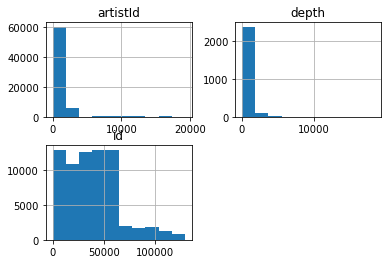

In [39]:
joint_df.hist()


In [41]:
X =joint_df.iloc[:, [0]]
y= joint_df.iloc[: ,23]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5, test_size=0.3)
X

,id
0,1035
1,1036
2,1037
3,1038
4,1039
...,...
69382,2576
69383,17412
69384,17422
69385,617


In [42]:

y

0       1901-01-01
1       1887-01-01
2       1876-01-01
3       1877-01-01
4       1880-01-01
           ...    
69382   1776-01-01
69383   1939-01-01
69384   1934-01-01
69385   1853-01-01
69386   1977-01-01
Name: yearOfBirth, Length: 69387, dtype: datetime64[ns]

In [43]:
y=y.dropna()
y

0       1901-01-01
1       1887-01-01
2       1876-01-01
3       1877-01-01
4       1880-01-01
           ...    
69382   1776-01-01
69383   1939-01-01
69384   1934-01-01
69385   1853-01-01
69386   1977-01-01
Name: yearOfBirth, Length: 3402, dtype: datetime64[ns]

In [44]:
X=X.dropna()
X

,id
0,1035
1,1036
2,1037
3,1038
4,1039
...,...
69382,2576
69383,17412
69384,17422
69385,617


In [45]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [46]:
import math
math.sqrt(len(y_test))

144.2809758769326

In [47]:
#Using Euclidean metric for neighbour classification
classifier = KNeighborsClassifier(n_neighbors= 144, p=2, metric="euclidean")

In [48]:
classifier.fit(X_train , y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=144)

In [49]:
y_pred = classifier.predict(X_test)
y_pred

array(['1901-01-01T00:00:00.000000000',                           'NaT',
       '1947-01-01T00:00:00.000000000', ...,
                                 'NaT',                           'NaT',
       '1967-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [50]:
print(accuracy_score(y_test, y_pred)*1000)

0.8646779074794638
